## 1. Count Daily Number of Tweets contain specific hashtag or keyword. 

In [1]:
import yaml
import searchtweets as tw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn')




search_args = tw.load_credentials("twitter_keys.yml",
                                     yaml_key="search_tweets_v2",
                                     env_overwrite=False)

def get_monthly_tweet_counts(hash_tag,start_time,end_time):
    "can only count 30-day window"

    hash_tag_str=''
    if isinstance(hash_tag,str):
        hash_tag_str='#'+hash_tag
    elif isinstance(hash_tag,list):
        hash_tag=['#'+tag for tag in hash_tag]
        hash_tag_str='('+' OR '.join(hash_tag)+')'

    rule=hash_tag_str+" lang:en -is:retweet -is:nullcast -is:reply"
    query = tw.gen_request_parameters(rule,granularity='day',
    start_time=start_time,end_time=end_time)
    counts = tw.collect_results(query,result_stream_args=search_args)[0]
    count_df=pd.DataFrame(counts['data'])
    count_df=count_df.drop(columns='end')
    count_df.start=pd.to_datetime(count_df.start).dt.tz_localize(None)
    count_df.index=count_df.start
    count_df=count_df.drop(columns='start')
    return count_df


def get_daily_tweet_counts(hashtag,start_time,end_time):
    date_range=pd.date_range(start_time,end_time,freq='d')
    N=len(date_range)
    sub_end=date_range[30].strftime("%Y-%m-%d") if N>=30 else date_range[-1]
    coin_counts=get_monthly_tweet_counts(hashtag,start_time,sub_end)
    if N<=30:
        return coin_counts
    
    
    for i in range(1,N//30+1):
        sub_range=date_range[i*30:(i+1)*30+1]
        
        if len(sub_range)>1:
            
            sub_start=sub_range[0].strftime("%Y-%m-%d")
            sub_end=sub_range[-1].strftime("%Y-%m-%d")
            print("from %s to %s"%(sub_start,sub_end))
            sub_counts=get_monthly_tweet_counts(hashtag,sub_start,sub_end)
            
            miss_date=sub_range[:-1][~sub_range[:-1].isin(sub_counts.index)]
            if len(miss_date)>=1:
                print("Miss dates: ",miss_date.values)
                for date_i in miss_date:    
                    end_date_i=date_i+pd.offsets.Day(1)
                    miss_count=get_monthly_tweet_counts(hashtag,date_i.strftime("%Y-%m-%d"), end_date_i.strftime("%Y-%m-%d"))
                    sub_counts=pd.concat([sub_counts,miss_count])
            print('len',len(sub_counts))
            coin_counts=pd.concat([coin_counts,sub_counts])
        
    
    return coin_counts

### 1.1 Count for Bitcoin 

In [2]:
start_time='2015-12-01'
end_time='2021-08-30'
hashtag='Bitcoin'

coin_counts=get_daily_tweet_counts(hashtag,start_time,end_time)

from 2015-12-31 to 2016-01-30
len 30
from 2016-01-30 to 2016-02-29
len 30
from 2016-02-29 to 2016-03-30
len 30
from 2016-03-30 to 2016-04-29
len 30
from 2016-04-29 to 2016-05-29
len 30
from 2016-05-29 to 2016-06-28
len 30
from 2016-06-28 to 2016-07-28
len 30
from 2016-07-28 to 2016-08-27
len 30
from 2016-08-27 to 2016-09-26
len 30
from 2016-09-26 to 2016-10-26
len 30
from 2016-10-26 to 2016-11-25
len 30
from 2016-11-25 to 2016-12-25
Miss dates:  ['2016-11-25T00:00:00.000000000' '2016-11-26T00:00:00.000000000'
 '2016-11-27T00:00:00.000000000' '2016-11-28T00:00:00.000000000'
 '2016-11-29T00:00:00.000000000' '2016-11-30T00:00:00.000000000'
 '2016-12-01T00:00:00.000000000' '2016-12-02T00:00:00.000000000'
 '2016-12-03T00:00:00.000000000' '2016-12-04T00:00:00.000000000'
 '2016-12-05T00:00:00.000000000' '2016-12-06T00:00:00.000000000'
 '2016-12-07T00:00:00.000000000' '2016-12-08T00:00:00.000000000'
 '2016-12-09T00:00:00.000000000' '2016-12-10T00:00:00.000000000'
 '2016-12-11T00:00:00.00000000

In [3]:
coin_counts.to_csv("/data/workspace_files/Count Tweets/%s_tweets_counts.csv"%(hashtag))
coin_counts

,tweet_count
start,
2015-12-01,9832
2015-12-02,9423
2015-12-03,9796
2015-12-04,8598
2015-12-05,8374
...,...
2021-08-25,31558
2021-08-26,30376
2021-08-27,29858


### 1.1 Count for btc,bitcoin,eth,ethereum,crypto,

In [5]:
hashtag=['btc','BTC','bitcoin','Bitcoin','eth','ETH','ethereum','Ethereum','crypto','Crypto']
tweet_counts=get_daily_tweet_counts(hashtag,start_time,end_time)
tweet_counts

from 2015-12-31 to 2016-01-30
len 30
from 2016-01-30 to 2016-02-29
len 30
from 2016-02-29 to 2016-03-30
len 30
from 2016-03-30 to 2016-04-29
len 30
from 2016-04-29 to 2016-05-29
len 30
from 2016-05-29 to 2016-06-28
len 30
from 2016-06-28 to 2016-07-28
len 30
from 2016-07-28 to 2016-08-27
len 30
from 2016-08-27 to 2016-09-26
len 30
from 2016-09-26 to 2016-10-26
len 30
from 2016-10-26 to 2016-11-25
len 30
from 2016-11-25 to 2016-12-25
len 30
from 2016-12-25 to 2017-01-24
len 30
from 2017-01-24 to 2017-02-23
len 30
from 2017-02-23 to 2017-03-25
Miss dates:  ['2017-02-23T00:00:00.000000000' '2017-02-24T00:00:00.000000000'
 '2017-02-25T00:00:00.000000000' '2017-02-26T00:00:00.000000000'
 '2017-02-27T00:00:00.000000000' '2017-02-28T00:00:00.000000000'
 '2017-03-01T00:00:00.000000000' '2017-03-02T00:00:00.000000000'
 '2017-03-03T00:00:00.000000000' '2017-03-04T00:00:00.000000000'
 '2017-03-05T00:00:00.000000000' '2017-03-06T00:00:00.000000000'
 '2017-03-07T00:00:00.000000000' '2017-03-08T00:0

 HTTP Error code: 429: Rate limit exceeded
 | Too Many Requests
 Request payload: {'query': '(#btc OR #BTC OR #bitcoin OR #Bitcoin OR #eth OR #ETH OR #ethereum OR #Ethereum OR #crypto OR #Crypto) lang:en -is:retweet -is:nullcast -is:reply', 'start_time': '2021-02-05T00:00:00Z', 'end_time': '2021-02-06T00:00:00Z', 'granularity': 'day'}
Rate limit hit... Will retry...
Will retry in 4 seconds...
 HTTP Error code: 429: Rate limit exceeded
 | Too Many Requests
 Request payload: {'query': '(#btc OR #BTC OR #bitcoin OR #Bitcoin OR #eth OR #ETH OR #ethereum OR #Ethereum OR #crypto OR #Crypto) lang:en -is:retweet -is:nullcast -is:reply', 'start_time': '2021-02-05T00:00:00Z', 'end_time': '2021-02-06T00:00:00Z', 'granularity': 'day'}
Rate limit hit... Will retry...
Will retry in 16 seconds...
 HTTP Error code: 429: Rate limit exceeded
 | Too Many Requests
 Request payload: {'query': '(#btc OR #BTC OR #bitcoin OR #Bitcoin OR #eth OR #ETH OR #ethereum OR #Ethereum OR #crypto OR #Crypto) lang:en -is

,tweet_count
start,
2015-12-01,10488
2015-12-02,10163
2015-12-03,10454
2015-12-04,9303
2015-12-05,9168
...,...
2021-08-29,64867
2021-08-01,59161
2021-08-02,84810


In [7]:
tweet_counts.to_csv("/data/workspace_files/Count Tweets/crypto_tweets_counts.csv")

### 1.2 Count for Ethereum

In [8]:
hashtag='Ethereum'
eth_counts=get_daily_tweet_counts(hashtag,start_time,end_time)
eth_counts

from 2015-12-31 to 2016-01-30
len 30
from 2016-01-30 to 2016-02-29
len 30
from 2016-02-29 to 2016-03-30
len 30
from 2016-03-30 to 2016-04-29
len 30
from 2016-04-29 to 2016-05-29
len 30
from 2016-05-29 to 2016-06-28
len 30
from 2016-06-28 to 2016-07-28
len 30
from 2016-07-28 to 2016-08-27
len 30
from 2016-08-27 to 2016-09-26
len 30
from 2016-09-26 to 2016-10-26
len 30
from 2016-10-26 to 2016-11-25
len 30
from 2016-11-25 to 2016-12-25
len 30
from 2016-12-25 to 2017-01-24
len 30
from 2017-01-24 to 2017-02-23
len 30
from 2017-02-23 to 2017-03-25
len 30
from 2017-03-25 to 2017-04-24
len 30
from 2017-04-24 to 2017-05-24
len 30
from 2017-05-24 to 2017-06-23
len 30
from 2017-06-23 to 2017-07-23
len 30
from 2017-07-23 to 2017-08-22
len 30
from 2017-08-22 to 2017-09-21
len 30
from 2017-09-21 to 2017-10-21
len 30
from 2017-10-21 to 2017-11-20
len 30
from 2017-11-20 to 2017-12-20
len 30
from 2017-12-20 to 2018-01-19
len 30
from 2018-01-19 to 2018-02-18
len 30
from 2018-02-18 to 2018-03-20
len 30
f

,tweet_count
start,
2015-12-01,39
2015-12-02,59
2015-12-03,58
2015-12-04,61
2015-12-05,39
...,...
2021-08-25,14028
2021-08-26,13008
2021-08-27,12842


In [9]:
eth_counts.to_csv("/data/workspace_files/Count Tweets/%s_tweets_counts.csv"%(hashtag))

### 1.3 Dogecoin

In [10]:
hashtag='Dogecoin'
doge_counts=get_daily_tweet_counts(hashtag,start_time,end_time)
doge_counts

from 2015-12-31 to 2016-01-30
len 30
from 2016-01-30 to 2016-02-29
len 30
from 2016-02-29 to 2016-03-30
len 30
from 2016-03-30 to 2016-04-29
len 30
from 2016-04-29 to 2016-05-29
len 30
from 2016-05-29 to 2016-06-28
len 30
from 2016-06-28 to 2016-07-28
len 30
from 2016-07-28 to 2016-08-27
len 30
from 2016-08-27 to 2016-09-26
len 30
from 2016-09-26 to 2016-10-26
len 30
from 2016-10-26 to 2016-11-25
len 30
from 2016-11-25 to 2016-12-25
len 30
from 2016-12-25 to 2017-01-24
len 30
from 2017-01-24 to 2017-02-23
len 30
from 2017-02-23 to 2017-03-25
len 30
from 2017-03-25 to 2017-04-24
len 30
from 2017-04-24 to 2017-05-24
len 30
from 2017-05-24 to 2017-06-23
len 30
from 2017-06-23 to 2017-07-23
len 30
from 2017-07-23 to 2017-08-22
len 30
from 2017-08-22 to 2017-09-21
len 30
from 2017-09-21 to 2017-10-21
len 30
from 2017-10-21 to 2017-11-20
len 30
from 2017-11-20 to 2017-12-20
len 30
from 2017-12-20 to 2018-01-19
len 30
from 2018-01-19 to 2018-02-18
len 30
from 2018-02-18 to 2018-03-20
len 30
f

,tweet_count
start,
2015-12-01,1397
2015-12-02,974
2015-12-03,1420
2015-12-04,1250
2015-12-05,531
...,...
2021-08-25,8531
2021-08-26,8207
2021-08-27,8087


In [11]:
doge_counts.to_csv("/data/workspace_files/Count Tweets/%s_tweets_counts.csv"%(hashtag))

In [2]:
btc_counts=pd.read_csv("/data/workspace_files/Count Tweets/Bitcoin_tweets_counts.csv",index_col=0)
eth_counts=pd.read_csv("/data/workspace_files/Count Tweets/Ethereum_tweets_counts.csv",index_col=0)
doge_counts=pd.read_csv("/data/workspace_files/Count Tweets/Dogecoin_tweets_counts.csv",index_col=0)
all_counts=pd.read_csv("/data/workspace_files/Count Tweets/crypto_tweets_counts.csv",index_col=0)

In [3]:
data_df=pd.DataFrame()
data_df['btc_eth']=all_counts['tweet_count']
data_df['btc']=btc_counts['tweet_count']
data_df['eth']=eth_counts['tweet_count']
#data_df['doge']=doge_counts['tweet_count']

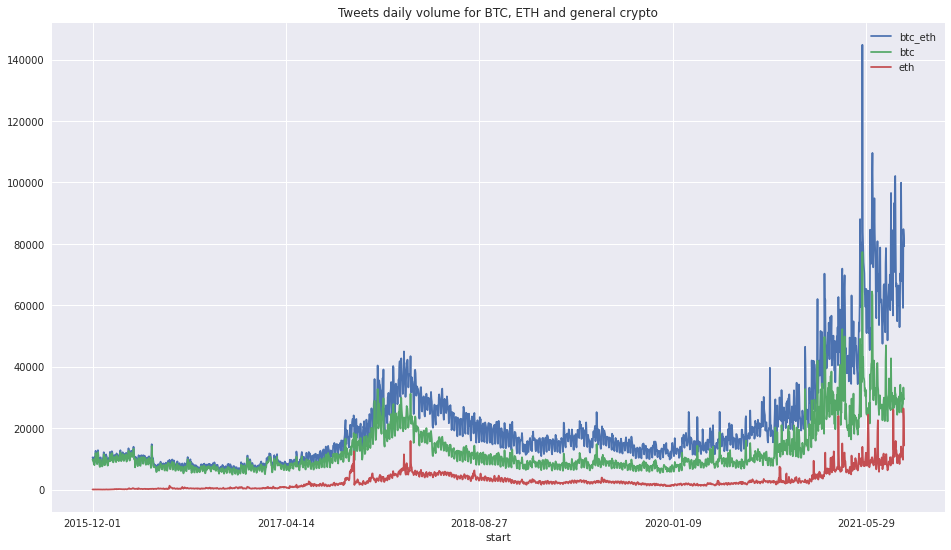

In [6]:
data_df.plot(figsize=(16,9),title='Tweets daily volume for BTC, ETH and general crypto')
plt.savefig('tweet_count')

In [15]:
data_df.describe()

,btc_eth,btc,eth,doge
count,2099.000000,2099.000000,2099.000000,2099.000000
mean,20718.921391,12499.658409,2893.702239,1439.157218
std,15928.950459,7718.429771,2870.905959,5135.799985
min,5432.000000,4848.000000,16.000000,45.000000
25%,10683.000000,7786.500000,968.000000,129.500000
50%,15926.000000,9490.000000,2218.000000,166.000000
75%,23428.500000,13884.500000,3680.500000,294.500000
max,144828.000000,77371.000000,26442.000000,125800.000000


In [16]:
eth_counts.describe()

,tweet_count
count,2099.000000
mean,2893.702239
std,2870.905959
min,16.000000
25%,968.000000
50%,2218.000000
75%,3680.500000
max,26442.000000


In [17]:
doge_counts.describe()

,tweet_count
count,2099.000000
mean,1439.157218
std,5135.799985
min,45.000000
25%,129.500000
50%,166.000000
75%,294.500000
max,125800.000000
